# Fashion MNIST Classification using PyTorch 👗👟👜

## Introduction

This project aims to classify images of clothing items from the Fashion MNIST dataset using a PyTorch-based deep learning model. 🧠 Fashion MNIST is a dataset of 70,000 grayscale images of clothing and accessories, each belonging to one of 10 categories. 👕👖 It serves as a drop-in replacement for the classic MNIST dataset, offering a more challenging classification task while maintaining a manageable size for experimentation. 🧪

The project will involve the following steps:

1. **Data Loading and Preprocessing:** Loading the Fashion MNIST dataset and preprocessing the images to prepare them for model training. 📥
2. **Model Building:** Designing and implementing a deep learning model using PyTorch, likely employing convolutional neural networks (CNNs) for image feature extraction. 🧱
3. **Model Training:** Training the model on the Fashion MNIST training dataset, optimizing its parameters to minimize classification errors. 🏋️‍♀️
4. **Model Evaluation:** Evaluating the trained model's performance on the Fashion MNIST test dataset, assessing its accuracy and generalization capabilities. 📊
5. **Visualization and Interpretation:** Visualizing the model's predictions and potentially exploring techniques for interpreting its learned features. 📈

In [2]:
# importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

In [ ]:
# set manual seed for reproducibility
torch.manual_seed(42)

## Dataloading and Preprocessing

 Loading the Fashion MNIST dataset and preprocessing the images to prepare them for model training.

In [4]:
df = pd.read_csv('fmnist_small.csv')
df.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,...,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,125,72,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,120,108,0,0,4,6,11,...,243,255,255,251,242,236,230,246,228,0,0,3,0,2,0,0,210,228,228,233,0,0,0,0,0,0,0,0,0,31,81,133,184,201,190,117,0,0,2,1,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,43,117,34,15,24,33,117,80,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,51,144,152,202,213,210,205,204,221,157,172,131,55,...,0,77,157,148,155,146,151,149,152,154,157,158,161,148,159,58,0,6,0,0,0,0,0,0,0,0,0,4,0,60,143,143,148,146,152,152,148,148,147,145,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,0,0,0,2,0,33,114,37,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,47,136,31,136,42,0,3,0,...,138,152,160,152,162,144,208,181,1,18,11,17,13,13,11,10,7,5,5,5,7,0,0,0,1,0,0,41,69,88,86,94,106,114,118,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,0,2,0,58,145,114,10,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,29,132,0,0,101,10,0,2,0,0,...,155,178,149,163,165,138,147,170,149,134,165,153,155,134,143,172,215,62,0,0,0,0,0,0,0,0,10,190,178,194,209,211,209,205,211,215,213,217,225,228,213,203,174,151,188,10,0,0,0,0
5,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,195,177,150,129,113,130,137,166,163,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,234,194,213,216,230,218,216,209,213,0,0,...,0,0,0,0,133,249,214,1,0,0,208,232,192,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,44,217,173,0,0,0,156,234,130,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,1,3,0,0,0,7,49,136,71,36,44,65,161,186,37,1,0,0,0,0,1,0,0,0,0,0,0,0,2,0,7,51,94,108,78,153,211,251,255,251,182,88,93,108,87,...,0,33,87,70,69,71,72,73,75,74,74,72,74,72,73,38,0,0,0,0,0,0,0,0,0,0,0,0,0,30,95,78,77,77,74,74,77,76,77,76,80,77,83,45,0,0,0,1,0,0


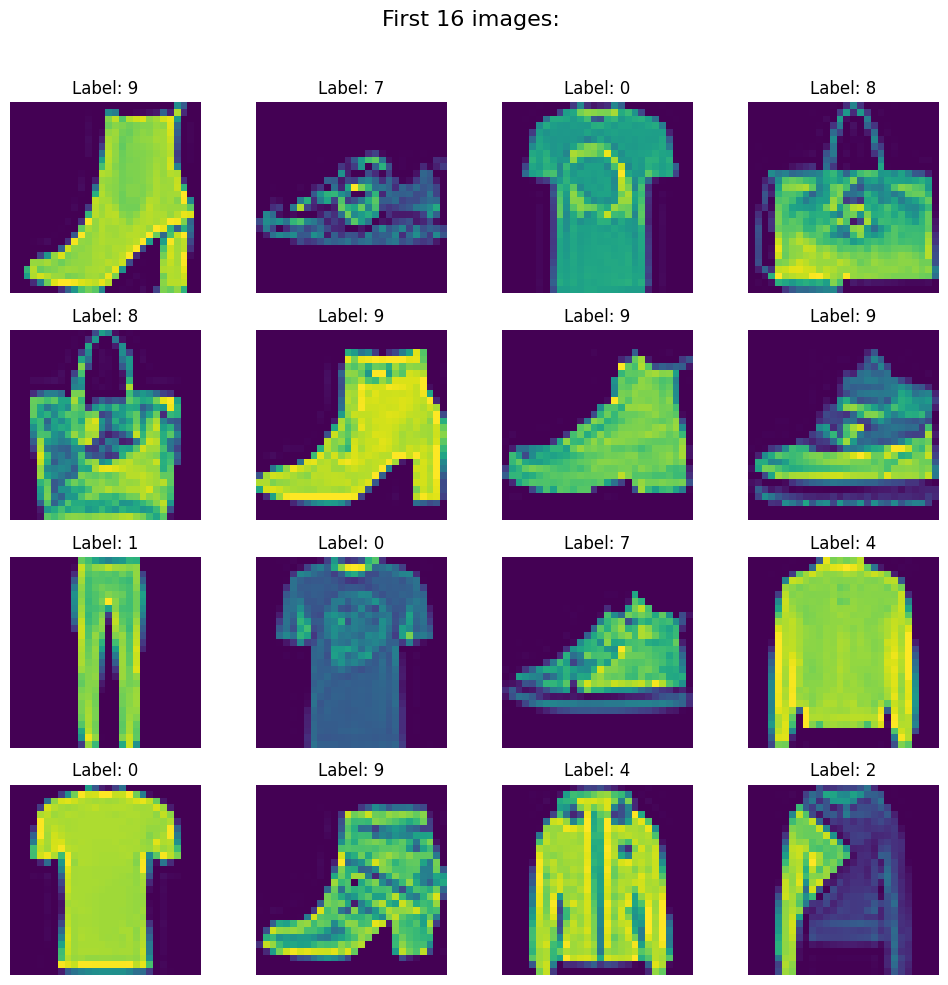

In [5]:
# visualizing images
fig, axs = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 images: ",fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axs.flat):
    img = df.iloc[i, 1:].values.reshape(28,28)
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(f"Label: {df.iloc[i, 0]}")

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()


In [6]:
# Train Test Split
X = df.iloc[:,1:].values
y = df.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Scaling the features
X_train = X_train/255.0
X_test = X_test/255.0

In [7]:
# Creating Custom Dataset class
class CustomDataset(Dataset):
  def __init__(self, features, labels):
    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, idx):
    return self.features[idx], self.labels[idx]


In [11]:
# create train dataset object
train_dataset = CustomDataset(X_train, y_train)
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [12]:
# Create test dataset object
test_dataset = CustomDataset(X_test, y_test)
test_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [14]:
# Create train and test dataloader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

## Model Building

Designing and implementing a deep learning model using PyTorch, likely employing convolutional neural networks (CNNs) for image feature extraction.

In [18]:
# define NN class
class FashionMnistNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10)
    )

  def forward(self, X):
    return self.model(X)

## Model Training

Training the model on the Fashion MNIST training dataset, optimizing its parameters to minimize classification errors.

In [15]:
#set learning rate and epochs
epochs = 100
learning_rate = 0.1

In [20]:
# Instantiate the model
model = FashionMnistNN(num_features=X_train.shape[1])

# set the loss function
criterion = nn.CrossEntropyLoss()

# set the optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)


In [22]:
len(train_dataloader)

150

In [23]:
# training loop
for epoch in range(epochs):

  total_epoch_loss = 0
  for batch_features, batch_labels in train_dataloader:

    # forward pass
    y_pred = model(batch_features)

    # calculate loss
    loss = criterion(y_pred, batch_labels)

    # backward pass
    optimizer.zero_grad()
    loss.backward()

    # update gradients
    optimizer.step()
    total_epoch_loss += loss.item()

  avg_loss = total_epoch_loss/len(train_dataloader)
  print("Epoch: {} Loss: {}".format(epoch + 1, avg_loss))

Epoch: 1 Loss: 0.003893095655706323
Epoch: 2 Loss: 0.00292067971987611
Epoch: 3 Loss: 0.002613411114822763
Epoch: 4 Loss: 0.002356133323046379
Epoch: 5 Loss: 0.0023793005587746546
Epoch: 6 Loss: 0.001976401197607629
Epoch: 7 Loss: 0.0019827321336682263
Epoch: 8 Loss: 0.0017236585036152973
Epoch: 9 Loss: 0.0017100045654418257
Epoch: 10 Loss: 0.0015727425452981454
Epoch: 11 Loss: 0.001551785144159415
Epoch: 12 Loss: 0.0013897593704556737
Epoch: 13 Loss: 0.001395937804239414
Epoch: 14 Loss: 0.0013511089716727535
Epoch: 15 Loss: 0.0012578290830909584
Epoch: 16 Loss: 0.0012057106143523318
Epoch: 17 Loss: 0.0011803315056992385
Epoch: 18 Loss: 0.0011703333136392758
Epoch: 19 Loss: 0.0010878956026256978
Epoch: 20 Loss: 0.0010551639791204555
Epoch: 21 Loss: 0.001064337986948279
Epoch: 22 Loss: 0.0010134921353892423
Epoch: 23 Loss: 0.0009507219950319268
Epoch: 24 Loss: 0.0009496346972688722
Epoch: 25 Loss: 0.0009288957674289122
Epoch: 26 Loss: 0.000897069878798599
Epoch: 27 Loss: 0.0008741882789

## Model Evaluation

 Evaluating the trained model's performance on the Fashion MNIST test dataset, assessing its accuracy and generalization capabilities.

In [24]:
# set the model to eval mode
model.eval()

FashionMnistNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [25]:
# evaluatin code
total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in test_dataloader:
    # forward pass
    outputs = model(batch_features)
    _, predicted = torch.max(outputs, 1)

    total += batch_labels.shape[0]
    correct += (predicted == batch_labels).sum().item()

print("Accuracy: {}%".format(100*correct/total))


Accuracy: 84.33333333333333%
